# D7047E Lab0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


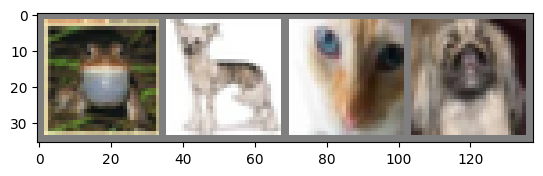

frog  dog   cat   dog  


In [2]:
batch_size = 4

# Class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.pool(self.leakyrelu(self.conv1(x)))
        x = self.pool(self.leakyrelu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()
optimizer = optim.SGD(net.parameters(), lr=0.0001)

In [4]:
criterion = nn.CrossEntropyLoss()

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch  2000] loss: 2.304
[Epoch 1, Batch  4000] loss: 2.304
[Epoch 1, Batch  6000] loss: 2.303
[Epoch 1, Batch  8000] loss: 2.303
[Epoch 1, Batch 10000] loss: 2.304
[Epoch 1, Batch 12000] loss: 2.302


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch  2000] loss: 2.302
[Epoch 2, Batch  4000] loss: 2.302
[Epoch 2, Batch  6000] loss: 2.302
[Epoch 2, Batch  8000] loss: 2.301
[Epoch 2, Batch 10000] loss: 2.301
[Epoch 2, Batch 12000] loss: 2.300
Finished Training


In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 13 %


In [6]:
# Redefining the SimpleCNN class with Tanh activation
class SimpleCNN_Tanh(nn.Module):
    def __init__(self):
        super(SimpleCNN_Tanh, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.pool(self.tanh(self.conv1(x)))
        x = self.pool(self.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net_tanh = SimpleCNN_Tanh()
optimizer = optim.Adam(net_tanh.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Training the network with Tanh activation
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

# Testing the network with Tanh activation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_tanh(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_tanh = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy_tanh}%')

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 2000] Loss: 1.988
[Epoch 1, Batch 4000] Loss: 1.801
[Epoch 1, Batch 6000] Loss: 1.691
[Epoch 1, Batch 8000] Loss: 1.640
[Epoch 1, Batch 10000] Loss: 1.572
[Epoch 1, Batch 12000] Loss: 1.520


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 2000] Loss: 1.487
[Epoch 2, Batch 4000] Loss: 1.443
[Epoch 2, Batch 6000] Loss: 1.422
[Epoch 2, Batch 8000] Loss: 1.396
[Epoch 2, Batch 10000] Loss: 1.399
[Epoch 2, Batch 12000] Loss: 1.377


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 51.5%


In [ ]:
# Setting up TensorBoard
writer = SummaryWriter('runs/cifar10_experiment_tanh')

# Training the network
for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # Log every 2000 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}')
            writer.add_scalar('training loss', running_loss / 2000, epoch * len(trainloader) + i)
            running_loss = 0.0

# Testing the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_tanh(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_tanh = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy_tanh}%')
writer.add_scalar('Accuracy', accuracy_tanh, 0)
writer.close()

/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 1, Batch 2000] Loss: 1.349
[Epoch 1, Batch 4000] Loss: 1.336
[Epoch 1, Batch 6000] Loss: 1.294
[Epoch 1, Batch 8000] Loss: 1.323
[Epoch 1, Batch 10000] Loss: 1.283
[Epoch 1, Batch 12000] Loss: 1.273


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Epoch 2, Batch 2000] Loss: 1.237
[Epoch 2, Batch 4000] Loss: 1.258
[Epoch 2, Batch 6000] Loss: 1.230
[Epoch 2, Batch 8000] Loss: 1.227
[Epoch 2, Batch 10000] Loss: 1.224
[Epoch 2, Batch 12000] Loss: 1.224


/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/akshaymalviya/Lulea/LuleaPythonVenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
